### Comparing Models

Now that you have seen a variety of models for regression and classification problems, it is good to step back and weigh the pros and cons of these options.  In the case of classification models, there are at least three things to consider:

1. Is the model good at handling imbalanced classes?
2. Does the model train quickly?
3. Does the model yield interpretable results?

Depending on your dataset and goals, the importance of these considerations will vary from project to project.  Your goal is to review our models to this point and discuss the pros and cons of each.  Two example datasets are offered as a way to offer two very different tasks where interpretability of the model may be of differing importance.

### Data and Task

Your goal is to discuss the pros and cons of Logistic Regression, Decision Trees, KNN, and SVM for the tasks below.  Consider at least the three questions above and list any additional considerations you believe are important to determining the "best" model for the task.  Share your response with your peers on the class discussion board.  

**TASK 1**: Predicting Customer Churn

Suppose you are tasked with producing a model to predict customer churn.  Which of your classification models would you use and what are the pros and cons of this model for this task?  Be sure to consider interpretability, imbalnced classes, and the speed of training.



In [138]:

import missingno as msno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [139]:
from plotly.figure_factory import create_table
from sklearn import tree
from category_encoders import TargetEncoder
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import warnings

warnings.filterwarnings("ignore")

The data is loaded below.  Note that the handwritten digit data is already split into features and target (`digits`, `labels`). 

### Churn Data

In [140]:
churn = pd.read_csv('data/telecom_churn.csv')

<Axes: >

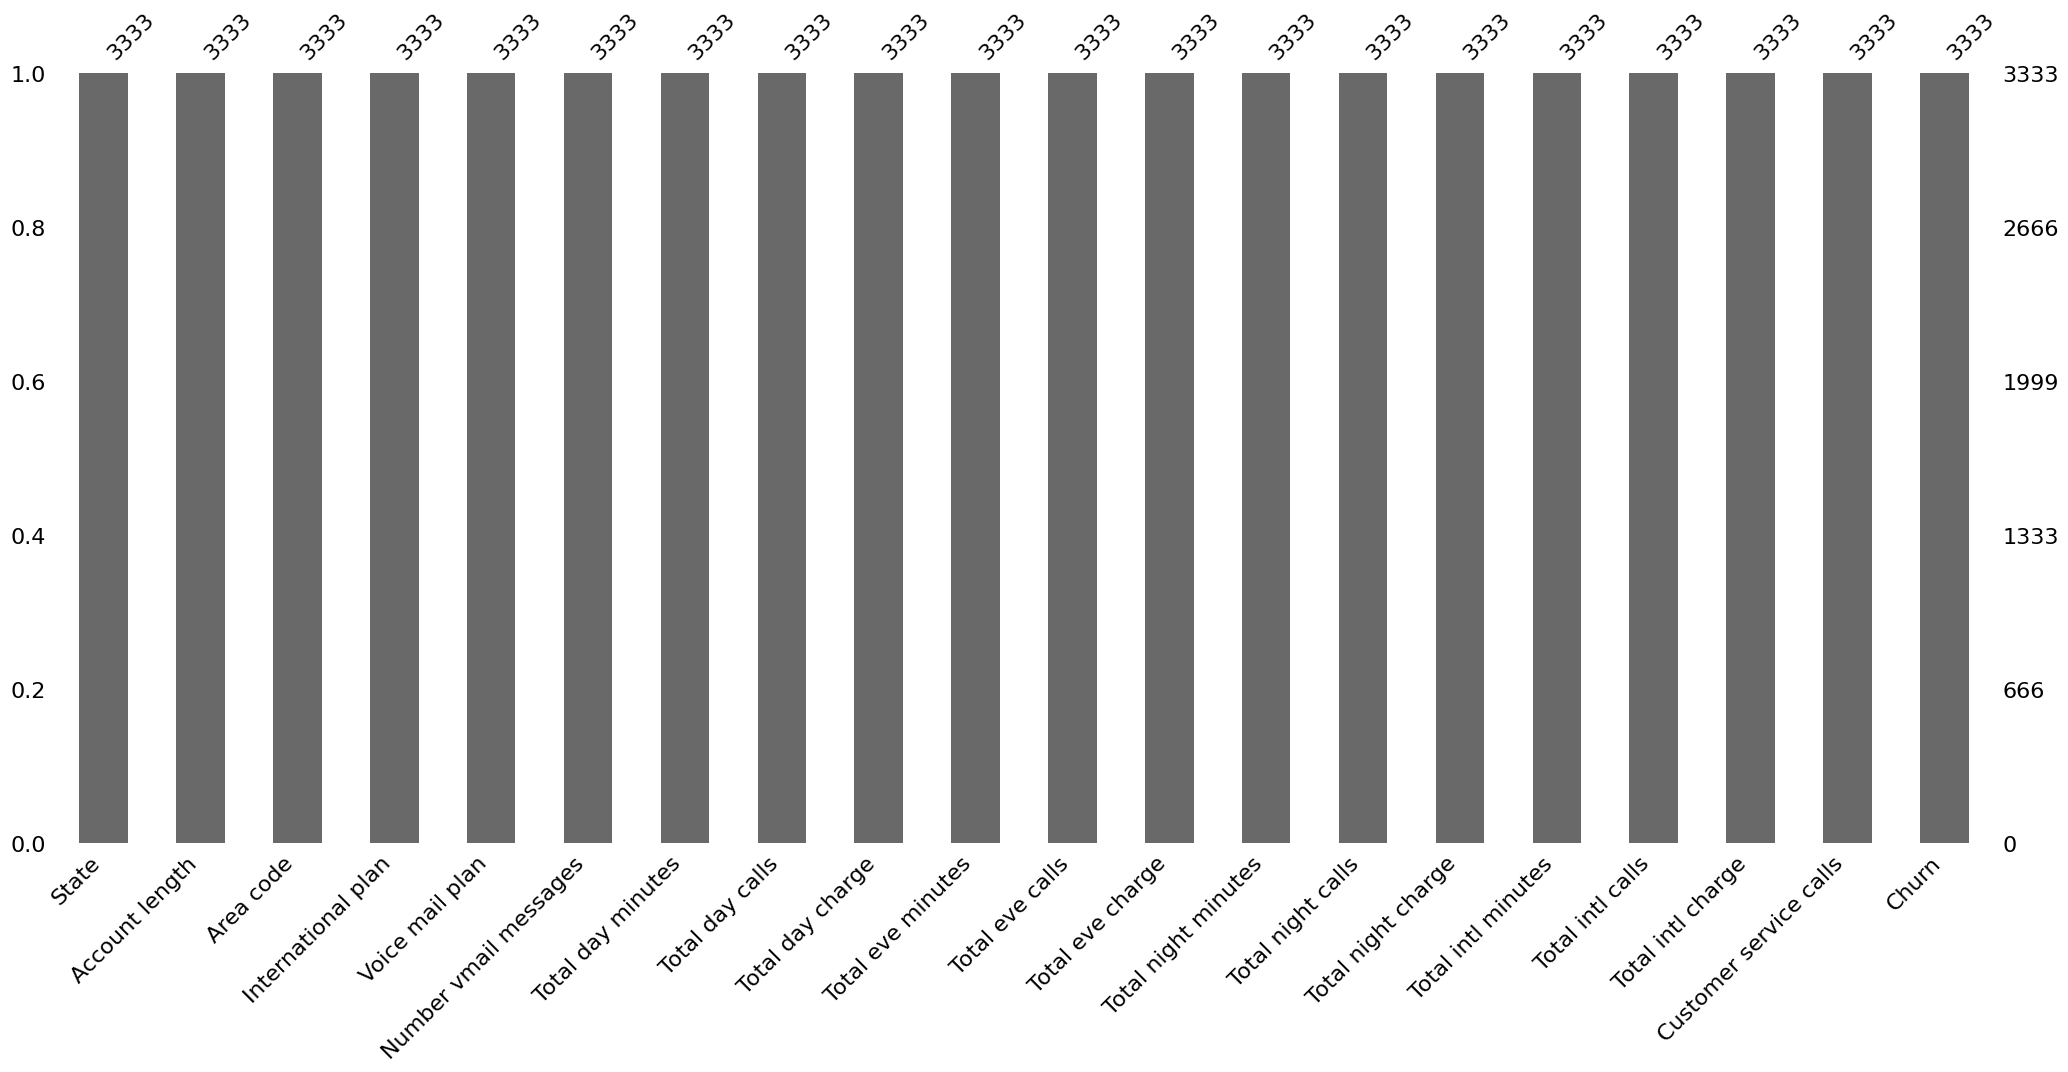

In [141]:
msno.bar(churn)

In [142]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [143]:
churn.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [144]:
churn.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [145]:
churn.Churn.value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [146]:
churn['Churn'] = churn['Churn'].replace({False:0, True:1})

In [147]:
encoder = TargetEncoder()
churn['State'] = encoder.fit_transform(churn['State'],churn['Churn'])
churn['International plan'] = encoder.fit_transform(churn['International plan'], churn['Churn'])
churn['Voice mail plan'] = encoder.fit_transform(churn['Voice mail plan'], churn['Churn'])

In [148]:
churn.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,0.185441,128,415,0.114950,0.086768,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0.128256,107,415,0.114950,0.086768,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0.263728,137,415,0.114950,0.167151,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,0.128256,84,408,0.424149,0.167151,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,0.147498,75,415,0.424149,0.167151,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [149]:
X_churn = churn.drop('Churn',axis=1)
y_churn = churn['Churn']
X_train_churn, X_test_churn, y_train_churn, y_test_churn = train_test_split(X_churn, y_churn, test_size=0.33, random_state=42)

In [150]:
scaler = StandardScaler()
X_train_churn_scaled = scaler.fit_transform(X_train_churn)
X_test_churn_scaled = scaler.transform(X_test_churn)

### Digit Data

In [151]:
frame_digits = load_digits(as_frame=True)['data']
frame_digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [152]:
digits, labels = load_digits(return_X_y=True)

In [153]:
X_digits = pd.DataFrame(digits)
y_digits = pd.DataFrame(labels, columns=['Label'])


In [154]:
X_digits.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [155]:
y_digits.value_counts()

Label
3        183
1        182
5        182
4        181
6        181
9        180
7        179
0        178
2        177
8        174
dtype: int64

In [156]:
X_train_digits, X_test_digits, y_train_digits, y_test_digits = train_test_split(X_digits, y_digits, test_size=0.33, random_state=42)

### Logistic Regression

- Churn

In [157]:
report_data_churn ={'Model' : ['Logistic Regression', 'Decision Tree', 'KNN', 'SVC'], 'Test Score' : [], 'Train Score' : [], 'Accuracy Score':[], 'Average Fit Time':[]}

In [158]:
logreg_churn = LogisticRegression()
logreg_churn.fit(X_train_churn, y_train_churn)

LogisticRegression()

In [159]:
y_pred_churn = logreg_churn.predict(X_test_churn)

lr_test_score_churn = logreg_churn.score(X_test_churn_scaled, y_test_churn)
lr_train_score_churn = logreg_churn.score(X_train_churn_scaled, y_train_churn)
lr_accuracy_churn_score = accuracy_score(y_test_churn, y_pred_churn)
lr_accuracy_churn_score_full = logreg_churn.score(X_churn, y_churn)
cv_results_churn = cross_validate(logreg_churn, X_churn, y_churn)
lr_churn_timeout = np.mean(cv_results_churn['fit_time'])

In [160]:
print('Train/Test split results:')
print(logreg_churn.__class__.__name__+" test score accuracy is %2.3f" % lr_test_score_churn )
print(logreg_churn.__class__.__name__+" train score accuracy is %2.3f" % lr_train_score_churn )
print(logreg_churn.__class__.__name__+" accuracy is %2.3f" % lr_accuracy_churn_score )
print(logreg_churn.__class__.__name__+" accuracy for whole dataset is %2.3f" % lr_accuracy_churn_score_full )
print(logreg_churn.__class__.__name__+" Average Fit Time is %2.3f" % lr_churn_timeout )

Train/Test split results:
LogisticRegression test score accuracy is 0.615
LogisticRegression train score accuracy is 0.609
LogisticRegression accuracy is 0.855
LogisticRegression accuracy for whole dataset is 0.856
LogisticRegression Average Fit Time is 0.018


In [161]:
report_data_churn['Test Score'].append(lr_test_score_churn)
report_data_churn['Train Score'].append(lr_train_score_churn)
report_data_churn['Accuracy Score'].append(lr_accuracy_churn_score)
report_data_churn['Average Fit Time'].append(lr_churn_timeout)

### Decision Trees

In [162]:
dt_churn = tree.DecisionTreeClassifier(criterion='entropy')
dt_churn.fit(X_train_churn, y_train_churn)

DecisionTreeClassifier(criterion='entropy')

In [163]:
y_pred_dt_churn = dt_churn.predict(X_test_churn)
dt_test_score_churn = dt_churn.score(X_test_churn_scaled, y_test_churn)
dt_train_score_churn = dt_churn.score(X_train_churn_scaled, y_train_churn)
dt_accuracy_churn_score = accuracy_score(y_test_churn, y_pred_dt_churn)
dt_accuracy_churn_score_full = dt_churn.score(X_churn, y_churn)
dt_cv_results_churn = cross_validate(dt_churn, X_churn, y_churn)
dt_churn_timeout = np.mean(dt_cv_results_churn['fit_time'])

In [164]:
print('Train/Test split results:')
print(dt_churn.__class__.__name__+" test score accuracy is %2.3f" % dt_test_score_churn )
print(dt_churn.__class__.__name__+" train score accuracy is %2.3f" % dt_train_score_churn )
print(dt_churn.__class__.__name__+" accuracy is %2.3f" % dt_accuracy_churn_score )
print(dt_churn.__class__.__name__+" accuracy for whole dataset is %2.3f" % dt_accuracy_churn_score_full )
print(dt_churn.__class__.__name__+" Average Fit Time is %2.3f" % dt_churn_timeout )

Train/Test split results:
DecisionTreeClassifier test score accuracy is 0.833
DecisionTreeClassifier train score accuracy is 0.845
DecisionTreeClassifier accuracy is 0.909
DecisionTreeClassifier accuracy for whole dataset is 0.970
DecisionTreeClassifier Average Fit Time is 0.057


In [165]:
report_data_churn['Test Score'].append(dt_test_score_churn)
report_data_churn['Train Score'].append(dt_train_score_churn)
report_data_churn['Accuracy Score'].append(dt_accuracy_churn_score)
report_data_churn['Average Fit Time'].append(dt_churn_timeout)

### KNN

In [166]:
knn_churn = KNeighborsClassifier()
knn_churn.fit(X_train_churn, y_train_churn)

KNeighborsClassifier()

In [167]:
y_pred_knn_churn = knn_churn.predict(X_test_churn)
knn_test_score_churn = knn_churn.score(X_test_churn_scaled, y_test_churn)
knn_train_score_churn = knn_churn.score(X_train_churn_scaled, y_train_churn)
knn_accuracy_churn_score = accuracy_score(y_test_churn, y_pred_knn_churn)
knn_accuracy_churn_score_full = knn_churn.score(X_churn, y_churn)
knn_cv_results_churn = cross_validate(knn_churn, X_churn, y_churn)
knn_churn_timeout = np.mean(knn_cv_results_churn['fit_time'])

In [168]:
print('Train/Test split results:')
print(knn_churn.__class__.__name__+" test score accuracy is %2.3f" % knn_test_score_churn )
print(knn_churn.__class__.__name__+" train score accuracy is %2.3f" % knn_train_score_churn )
print(knn_churn.__class__.__name__+" accuracy is %2.3f" % knn_accuracy_churn_score )
print(knn_churn.__class__.__name__+" accuracy for whole dataset is %2.3f" % knn_accuracy_churn_score_full )
print(knn_churn.__class__.__name__+" Average Fit Time is %2.3f" % knn_churn_timeout )

Train/Test split results:
KNeighborsClassifier test score accuracy is 0.855
KNeighborsClassifier train score accuracy is 0.855
KNeighborsClassifier accuracy is 0.869
KNeighborsClassifier accuracy for whole dataset is 0.885
KNeighborsClassifier Average Fit Time is 0.002


In [169]:
report_data_churn['Test Score'].append(knn_test_score_churn)
report_data_churn['Train Score'].append(knn_train_score_churn)
report_data_churn['Accuracy Score'].append(knn_accuracy_churn_score)
report_data_churn['Average Fit Time'].append(knn_churn_timeout)

### SVM

In [170]:
svm_churn = SVC()
svm_churn.fit(X_train_churn, y_train_churn)

SVC()

In [171]:
y_pred_svm_churn = svm_churn.predict(X_test_churn)
svm_test_score_churn = svm_churn.score(X_test_churn_scaled, y_test_churn)
svm_train_score_churn = svm_churn.score(X_train_churn_scaled, y_train_churn)
svm_accuracy_churn_score = accuracy_score(y_test_churn, y_pred_svm_churn)
svm_accuracy_churn_score_full = svm_churn.score(X_churn, y_churn)
svm_cv_results_churn = cross_validate(svm_churn, X_churn, y_churn)
svm_churn_timeout = np.mean(svm_cv_results_churn['fit_time'])

In [172]:
print('Train/Test split results:')
print(svm_churn.__class__.__name__+" test score accuracy is %2.3f" % svm_test_score_churn )
print(svm_churn.__class__.__name__+" train score accuracy is %2.3f" % svm_train_score_churn )
print(svm_churn.__class__.__name__+" accuracy is %2.3f" % svm_accuracy_churn_score )
print(svm_churn.__class__.__name__+" accuracy for whole dataset is %2.3f" % svm_accuracy_churn_score_full )
print(svm_churn.__class__.__name__+" Average Fit Time is %2.3f" % svm_churn_timeout )

Train/Test split results:
SVC test score accuracy is 0.855
SVC train score accuracy is 0.855
SVC accuracy is 0.855
SVC accuracy for whole dataset is 0.855
SVC Average Fit Time is 0.071


In [173]:
report_data_churn['Test Score'].append(svm_test_score_churn)
report_data_churn['Train Score'].append(svm_train_score_churn)
report_data_churn['Accuracy Score'].append(svm_accuracy_churn_score)
report_data_churn['Average Fit Time'].append(svm_churn_timeout)

**TASK 2**: Recognizing Handwritten Digits

Suppose you are tasked with training a model to recognize handwritten digits.  Which of your classifier would you use here and why?  Again, be sure to consider the balance of classes, speed of training, and importance of interpretability.



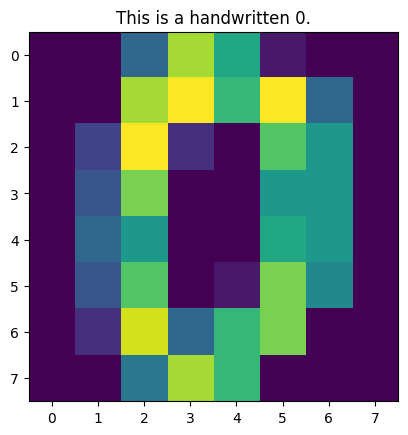

In [174]:
#example image
plt.imshow(digits[0].reshape(8, 8))
plt.title('This is a handwritten 0.');

In [175]:
# Metrix data
report_data_digits ={'Model' : ['Logistic Regression', 'Decision Tree', 'KNN', 'SVC'], 'Test Score' : [], 'Train Score' : [], 'Accuracy Score':[], 'Average Fit Time':[]}

#### Logistic Regression

In [176]:
logreg_digits = LogisticRegression()
logreg_digits.fit(X_train_digits, y_train_digits)
y_pred_digits = logreg_digits.predict(X_test_digits)

lr_test_score_digits = logreg_digits.score(X_test_digits, y_test_digits)
lr_train_score_digits = logreg_digits.score(X_train_digits, y_train_digits)
lr_accuracy_digits_score = accuracy_score(y_test_digits, y_pred_digits)
lr_accuracy_digits_score_full = logreg_digits.score(X_digits, y_digits)
cv_results_digits = cross_validate(logreg_digits, X_digits, y_digits)
lr_digits_timeout = np.mean(cv_results_digits['fit_time'])

In [177]:
print('Train/Test split results:')
print(logreg_digits.__class__.__name__+" test score accuracy is %2.3f" % lr_test_score_digits )
print(logreg_digits.__class__.__name__+" train score accuracy is %2.3f" % lr_train_score_digits )
print(logreg_digits.__class__.__name__+" accuracy is %2.3f" % lr_accuracy_digits_score )
print(logreg_digits.__class__.__name__+" accuracy for whole dataset is %2.3f" % lr_accuracy_digits_score_full )
print(logreg_digits.__class__.__name__+" Average Fit Time is %2.3f" % lr_digits_timeout )

Train/Test split results:
LogisticRegression test score accuracy is 0.963
LogisticRegression train score accuracy is 1.000
LogisticRegression accuracy is 0.963
LogisticRegression accuracy for whole dataset is 0.988
LogisticRegression Average Fit Time is 0.065


In [178]:
report_data_digits['Test Score'].append(lr_test_score_digits)
report_data_digits['Train Score'].append(lr_train_score_digits)
report_data_digits['Accuracy Score'].append(lr_accuracy_digits_score)
report_data_digits['Average Fit Time'].append(lr_digits_timeout)

### Decision Trees

In [179]:
dt_digits = tree.DecisionTreeClassifier(criterion='entropy')
dt_digits.fit(X_train_digits, y_train_digits)

DecisionTreeClassifier(criterion='entropy')

In [180]:
y_pred_dt_digits = dt_digits.predict(X_test_digits)
dt_test_score_digits = dt_digits.score(X_test_digits, y_test_digits)
dt_train_score_digits = dt_digits.score(X_train_digits, y_train_digits)
dt_accuracy_digits_score = accuracy_score(y_test_digits, y_pred_dt_digits)
dt_accuracy_digits_score_full = dt_digits.score(X_digits, y_digits)
dt_cv_results_digits = cross_validate(dt_digits, X_digits, y_digits)
dt_digits_timeout = np.mean(dt_cv_results_digits['fit_time'])

In [181]:
print('Train/Test split results:')
print(dt_digits.__class__.__name__+" test score accuracy is %2.3f" % dt_test_score_digits )
print(dt_digits.__class__.__name__+" train score accuracy is %2.3f" % dt_train_score_digits )
print(dt_digits.__class__.__name__+" accuracy is %2.3f" % dt_accuracy_digits_score )
print(dt_digits.__class__.__name__+" accuracy for whole dataset is %2.3f" % dt_accuracy_digits_score_full )
print(dt_digits.__class__.__name__+" Average Fit Time is %2.3f" % dt_digits_timeout )

Train/Test split results:
DecisionTreeClassifier test score accuracy is 0.854
DecisionTreeClassifier train score accuracy is 1.000
DecisionTreeClassifier accuracy is 0.854
DecisionTreeClassifier accuracy for whole dataset is 0.952
DecisionTreeClassifier Average Fit Time is 0.025


In [182]:
report_data_digits['Test Score'].append(dt_test_score_digits)
report_data_digits['Train Score'].append(dt_train_score_digits)
report_data_digits['Accuracy Score'].append(dt_accuracy_digits_score)
report_data_digits['Average Fit Time'].append(lr_digits_timeout)

### KNN

In [183]:
knn_digits = KNeighborsClassifier()
knn_digits.fit(X_train_digits, y_train_digits)

KNeighborsClassifier()

In [184]:
y_pred_knn_digits = knn_digits.predict(X_test_digits)
knn_test_score_digits = knn_digits.score(X_test_digits, y_test_digits)
knn_train_score_digits = knn_digits.score(X_train_digits, y_train_digits)
knn_accuracy_digits_score = accuracy_score(y_test_digits, y_pred_knn_digits)
knn_accuracy_digits_score_full = knn_digits.score(X_digits, y_digits)
knn_cv_results_digits = cross_validate(knn_digits, X_digits, y_digits)
knn_digits_timeout = np.mean(knn_cv_results_digits['fit_time'])

In [185]:
print('Train/Test split results:')
print(knn_digits.__class__.__name__+" test score accuracy is %2.3f" % knn_test_score_digits )
print(knn_digits.__class__.__name__+" train score accuracy is %2.3f" % knn_train_score_digits )
print(knn_digits.__class__.__name__+" accuracy is %2.3f" % knn_accuracy_digits_score )
print(knn_digits.__class__.__name__+" accuracy for whole dataset is %2.3f" % knn_accuracy_digits_score_full )
print(knn_digits.__class__.__name__+" Average Fit Time is %2.3f" % knn_digits_timeout )

Train/Test split results:
KNeighborsClassifier test score accuracy is 0.993
KNeighborsClassifier train score accuracy is 0.989
KNeighborsClassifier accuracy is 0.993
KNeighborsClassifier accuracy for whole dataset is 0.991
KNeighborsClassifier Average Fit Time is 0.002


In [186]:
report_data_digits['Test Score'].append(knn_test_score_digits)
report_data_digits['Train Score'].append(knn_train_score_digits)
report_data_digits['Accuracy Score'].append(knn_accuracy_digits_score)
report_data_digits['Average Fit Time'].append(knn_digits_timeout)

### SVM

In [187]:
svm_digits = SVC()
svm_digits.fit(X_train_digits, y_train_digits)

SVC()

In [188]:
y_pred_svm_digits = svm_digits.predict(X_test_digits)
svm_test_score_digits = svm_digits.score(X_test_digits, y_test_digits)
svm_train_score_digits = svm_digits.score(X_train_digits, y_train_digits)
svm_accuracy_digits_score = accuracy_score(y_test_digits, y_pred_svm_digits)
svm_accuracy_digits_score_full = svm_digits.score(X_digits, y_digits)
svm_cv_results_digits = cross_validate(svm_digits, X_digits, y_digits)
svm_digits_timeout = np.mean(svm_cv_results_digits['fit_time'])

In [189]:
print('Train/Test split results:')
print(svm_digits.__class__.__name__+" test score accuracy is %2.3f" % svm_test_score_digits )
print(svm_digits.__class__.__name__+" train score accuracy is %2.3f" % svm_train_score_digits )
print(svm_digits.__class__.__name__+" accuracy is %2.3f" % svm_accuracy_digits_score )
print(svm_digits.__class__.__name__+" accuracy for whole dataset is %2.3f" % svm_accuracy_digits_score_full )
print(svm_digits.__class__.__name__+" Average Fit Time is %2.3f" % svm_digits_timeout )

Train/Test split results:
SVC test score accuracy is 0.987
SVC train score accuracy is 0.997
SVC accuracy is 0.987
SVC accuracy for whole dataset is 0.993
SVC Average Fit Time is 0.026


In [190]:
report_data_digits['Test Score'].append(svm_test_score_digits)
report_data_digits['Train Score'].append(svm_train_score_digits)
report_data_digits['Accuracy Score'].append(svm_accuracy_digits_score)
report_data_digits['Average Fit Time'].append(svm_digits_timeout)

In [191]:
report_data_churn

{'Model': ['Logistic Regression', 'Decision Tree', 'KNN', 'SVC'],
 'Test Score': [0.6145454545454545,
  0.8327272727272728,
  0.8545454545454545,
  0.8545454545454545],
 'Train Score': [0.6085982982534707,
  0.8450515002239141,
  0.8553515450067174,
  0.8553515450067174],
 'Accuracy Score': [0.8545454545454545,
  0.9090909090909091,
  0.8690909090909091,
  0.8545454545454545],
 'Average Fit Time': [0.01811676025390625,
  0.05663080215454101,
  0.0016216278076171876,
  0.07093229293823242]}

In [192]:
report_data_churn

{'Model': ['Logistic Regression', 'Decision Tree', 'KNN', 'SVC'],
 'Test Score': [0.6145454545454545,
  0.8327272727272728,
  0.8545454545454545,
  0.8545454545454545],
 'Train Score': [0.6085982982534707,
  0.8450515002239141,
  0.8553515450067174,
  0.8553515450067174],
 'Accuracy Score': [0.8545454545454545,
  0.9090909090909091,
  0.8690909090909091,
  0.8545454545454545],
 'Average Fit Time': [0.01811676025390625,
  0.05663080215454101,
  0.0016216278076171876,
  0.07093229293823242]}

In [193]:
df_churn = pd.DataFrame.from_dict(report_data_churn)
df_churn.set_index('Model', inplace=True)
df_churn.head()

,Test Score,Train Score,Accuracy Score,Average Fit Time
Model,,,,
Logistic Regression,0.614545,0.608598,0.854545,0.018117
Decision Tree,0.832727,0.845052,0.909091,0.056631
KNN,0.854545,0.855352,0.869091,0.001622
SVC,0.854545,0.855352,0.854545,0.070932


In [194]:
create_table(df_churn, index_title='Model',index=True)

In [195]:
df_digits = pd.DataFrame.from_dict(report_data_digits)
df_digits.set_index('Model', inplace=True)
df_digits.head()

,Test Score,Train Score,Accuracy Score,Average Fit Time
Model,,,,
Logistic Regression,0.962963,1.000000,0.962963,0.065278
Decision Tree,0.853535,1.000000,0.853535,0.065278
KNN,0.993266,0.989194,0.993266,0.002011
SVC,0.986532,0.996675,0.986532,0.026405


In [196]:
create_table(df_digits, index_title='Model',index=True)

In [197]:
#https://www.kaggle.com/datasets/upadorprofzs/credit-risk
credit = pd.read_csv('data/original.csv')
X_credit = credit.drop(columns=['default'])
y_credit = credit['default']

In [198]:
y_credit.value_counts()

0    1717
1     283
Name: default, dtype: int64